## PyTorch-LinearRegression

In the notebook below we will demonstrate use of **PyTorch** to fit a **Linear Regression** model. We will be using the linear layer of **PyTorch** for this example.

In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create fake X y data
torch.manual_seed(42)
x = torch.linspace(0,1, 100).reshape(-1,1)
e = torch.randn_like(x)
y = 10*x + 11 + e

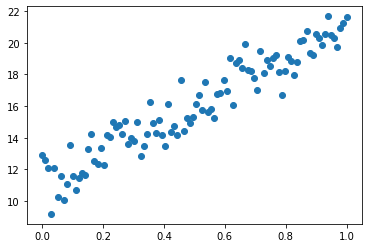

In [3]:
plt.scatter(x.numpy(), y.numpy())

In [4]:
#Lets define a model class with one single Linear layer
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear_ = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear_(x)
        return y_pred
    
    

In [5]:
#Initial random weights of the model
model = Model(1, 1)
print(model)
print('Weight:', model.linear_.weight.item())
print('Bias:  ', model.linear_.bias.item())

Model(
  (linear_): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.1563711166381836
Bias:   -0.8799213171005249


In [6]:
#Setup the loss function
#We will use Mean Square Error Loss
criterion = nn.MSELoss()

In [7]:
#Setup the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [12]:
#Now lets train the model
#Select the number of epocs
epochs = 100

#Make an empty list to save the losses
losses = []

for i in range(epochs):
    #Make a forward step in the model
    y_pred = model.forward(x)
    
    #Calculate the loss
    loss = criterion(y_pred, y)
    
    #Save the loss
    losses.append(loss)
    
    #Print the loss
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear_.weight.item():10.8f}  \
bias: {model.linear_.bias.item():10.8f}') 
    
    #Reset the gradient in the optimizer
    optimizer.zero_grad()
    
    #Recalculate gradients and update parameters
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.00265360  weight: 9.26239777  bias: 11.45295334
epoch:  1  loss: 1.00159466  weight: 9.27149868  bias: 11.44807625
epoch:  2  loss: 1.00056386  weight: 9.28047752  bias: 11.44326401
epoch:  3  loss: 0.99956030  weight: 9.28933620  bias: 11.43851662
epoch:  4  loss: 0.99858403  weight: 9.29807568  bias: 11.43383312
epoch:  5  loss: 0.99763334  weight: 9.30669785  bias: 11.42921162
epoch:  6  loss: 0.99670821  weight: 9.31520462  bias: 11.42465305
epoch:  7  loss: 0.99580765  weight: 9.32359695  bias: 11.42015553
epoch:  8  loss: 0.99493110  weight: 9.33187675  bias: 11.41571808
epoch:  9  loss: 0.99407786  weight: 9.34004593  bias: 11.41133976
epoch: 10  loss: 0.99324709  weight: 9.34810543  bias: 11.40702057
epoch: 11  loss: 0.99243879  weight: 9.35605717  bias: 11.40275860
epoch: 12  loss: 0.99165225  weight: 9.36390209  bias: 11.39855385
epoch: 13  loss: 0.99088615  weight: 9.37164116  bias: 11.39440632
epoch: 14  loss: 0.99014044  weight: 9.37927723  bias: 11.3903

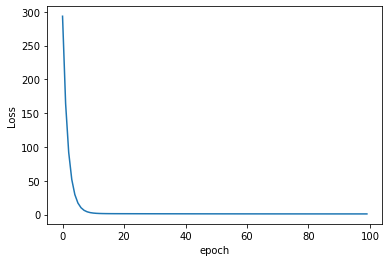

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

Current weight: 9.26239777, Current bias: 11.45295334


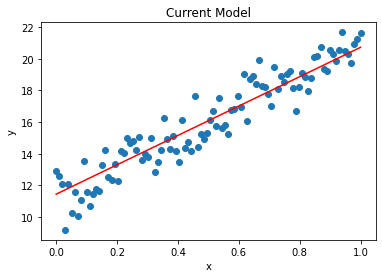

In [10]:
#Final fit 

w1,b1 = model.linear_.weight.item(), model.linear_.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')

y1 = x*w1 + b1

plt.scatter(x.numpy(), y.numpy())
plt.plot(x,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

We got a very decent fit.  Let compare this with sklearn Linear regression

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.numpy(), y.numpy())
print(f"Intercept={reg.intercept_}, Coef={reg.coef_}")

Intercept=[11.089241], Coef=[[9.941049]]


Very close answer